In [2]:
# import the necessary packages
import numpy as np
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Website Example:

Removing shapes within a certain color range

In [ ]:
example_path = 'finding_shapes_example.png'

In [ ]:
img_example = cv2.imread(example_path)
plt.imshow(img_example); 

In [ ]:
# find all of the 'black shapes' in the image
lower = np.array([0,0,0]) # pure black in BGR order
upper = np.array([15, 15, 15]) # very dark shade of grey

# find all pixels with the upper and lower range
shapeMask = cv2.inRange(img_example, lower, upper)
plt.imshow(shapeMask);

In [ ]:
# Detecting the contours of the shapeMask

# external contours--boundaries
cnts = cv2.findContours(shapeMask.copy(), 
                        cv2.RETR_EXTERNAL,
                        cv2.CHAIN_APPROX_SIMPLE
                       )
cnts = imutils.grab_contours(cnts) # parse contours
print(f'Found {len(cnts)} black shapes.')
plt.imshow(shapeMask)

Takes such a long time...

In [ ]:
# loop over the contours
for c in cnts:
    # draw the contour and show it
    cv2.drawContours(img_example, [c], -1, (0, 255, 0), 2)
    plt.imshow(img_example)
#     cv2.waitKey(0)

# Remove Background from an image

# With Blur

https://datacarpentry.org/image-processing/07-thresholding/

In [135]:
image_path = 'data/testing/earrings/776984217.jpg'
img = cv2.imread(image_path)

In [164]:
import re
re.split('[./]', image_path)[-2]

'776984217'

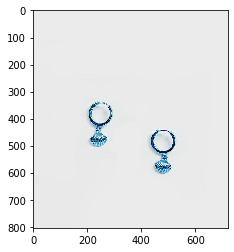

In [136]:
plt.imshow(img);

In [137]:
# blur and grayscale before thresholding
blur = cv2.cvtColor(src = img, code = cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(src = blur, 
    ksize = (1,1), 
    sigmaX = 0)

In [138]:
# perform inverse binary thresholding 
(t, maskLayer) = cv2.threshold(src = blur, 
    thresh = 0, 
    maxval = 255, 
    type = cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

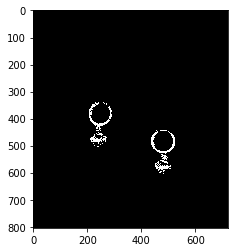

In [139]:
# make a mask suitable for color images
mask = cv2.merge(mv = [maskLayer, maskLayer, maskLayer])

# display the mask image
plt.imshow(mask)

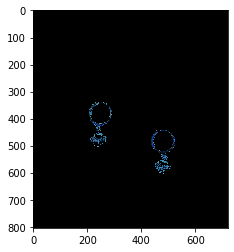

In [140]:
# use the mask to select the "interesting" part of the image
sel = cv2.bitwise_and(src1 = img, src2 = mask)
plt.imshow(sel)

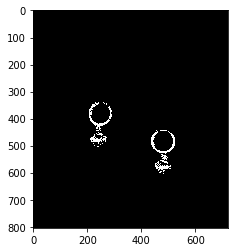

In [141]:
plt.imshow(mask)

# Find contours 

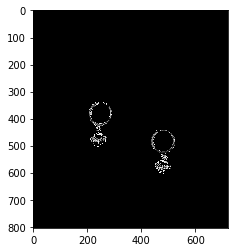

In [142]:
gray = cv2.cvtColor(sel, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [143]:
retval, thresh_gray = cv2.threshold(gray, 
                                    thresh=0, 
                                    maxval=255, 
                                   type=cv2.THRESH_BINARY_INV)

In [144]:
contours,hierarchy = cv2.findContours(maskLayer,cv2.RETR_LIST, \
                                   cv2.CHAIN_APPROX_SIMPLE)

In [168]:
# Find object with the biggest bounding box
mx = (0,0,0,0)      # biggest bounding box so far
mx_area = 0
for cont in contours:
    x,y,w,h = cv2.boundingRect(cont)
    area = w*h
    if area > mx_area:
        mx = x,y,w,h
        mx_area = area
x,y,w,h = mx

In [174]:
cv2.boundingRect(contours[4])

(492, 594, 1, 1)

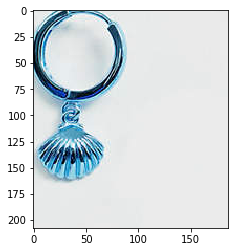

In [183]:
# Output to files
roi=img[y:y+h+100,x:x+w+100]
cv2.imwrite('Image_crop.jpg', roi)
plt.imshow(roi)

In [237]:
cv2.rectangle(img,(x,y),(x+w,y+h),(200,0,0),2)
cv2.imwrite('Image_cont.jpg', img)

True

In [195]:
# trying to get the top 2 bounding boxes
cont_dimen = dict()

for cont in contours:
    x,y,w,h = cv2.boundingRect(cont)
    area = w*h
    cont_dimen[area] = list([x,y,w,h])

In [203]:
# biggest two bounding boxes
sorted(cont_dimen)[-2:]

[8554, 9288]

In [206]:
cont_dimen

{4: [450, 447, 2, 2],
 18: [252, 340, 9, 2],
 1: [216, 351, 1, 1],
 2: [245, 433, 2, 1],
 5: [246, 340, 5, 1],
 28: [470, 590, 4, 7],
 12: [234, 347, 4, 3],
 32: [472, 587, 4, 8],
 9: [231, 346, 3, 3],
 15: [448, 466, 3, 5],
 20: [229, 349, 5, 4],
 30: [482, 552, 6, 5],
 2379: [450, 563, 61, 39],
 140: [452, 560, 14, 10],
 624: [463, 551, 39, 16],
 8: [265, 342, 4, 2],
 56: [480, 536, 8, 7],
 420: [474, 532, 20, 21],
 3: [256, 492, 1, 3],
 40: [239, 439, 8, 5],
 7: [258, 487, 1, 7],
 26: [249, 485, 2, 13],
 16: [266, 470, 4, 4],
 150: [263, 465, 10, 15],
 3021: [212, 451, 57, 53],
 8554: [435, 442, 91, 94],
 54: [236, 435, 9, 6],
 36: [224, 423, 9, 4],
 6: [216, 391, 2, 3],
 21: [211, 371, 3, 7],
 24: [227, 347, 6, 4],
 95: [286, 376, 5, 19],
 224: [216, 360, 8, 28],
 42: [272, 346, 7, 6],
 9288: [206, 341, 86, 108],
 228: [219, 337, 19, 12]}

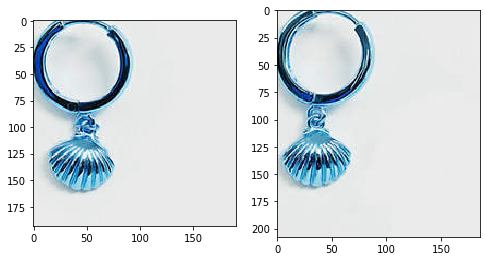

In [215]:
fig=plt.figure(figsize=(8, 8))
rows = 1
columns = 2

for i, box in zip(range(1,3),sorted(cont_dimen)[-2:]):
    x,y,w,h = cont_dimen[box]
    roi=img[y:y+h+100,x:x+w+100]
    fig.add_subplot(rows, columns, i)
    plt.imshow(roi)

In [3]:
import os
os.getcwd()

'/Users/linhchau/Desktop/galvanize/jewelery_recommender'

# Pipeline

In [18]:
import re

def get_biggest_two_bounding(path, output_dir):
    img = cv2.imread(path)
    image_id = re.split('[./]', path)[-2]
    print(image_id)
    
    # blur and grayscale before thresholding
    blur = cv2.cvtColor(src = img, code = cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(src = blur, 
                            ksize = (1,1), 
                            sigmaX = 0)
    
    # perform inverse binary thresholding 
    (t, maskLayer) = cv2.threshold(src = blur, 
                                    thresh = 0, 
                                    maxval = 255, 
                                    type = cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # make a mask suitable for color images
    mask = cv2.merge(mv = [maskLayer, maskLayer, maskLayer])
    
    # use the mask to select the "interesting" part of the image
    sel = cv2.bitwise_and(src1 = img, src2 = mask)
    
    contours,hierarchy = cv2.findContours(maskLayer,
                                          cv2.RETR_LIST,
                                          cv2.CHAIN_APPROX_SIMPLE
                                         )
    # trying to get the top 2 bounding boxes
    cont_dimen = dict()

    for cont in contours:
        x,y,w,h = cv2.boundingRect(cont)
        area = w*h
        cont_dimen[area] = list([x,y,w,h])
    
#     fig=plt.figure(figsize=(8, 8))
#     rows = 1
#     columns = 2
    
    if not os.path.isdir(output_dir) :
        os.mkdir(output_dir)  # make sure the directory exists

    for i, box in zip(range(1,3),sorted(cont_dimen)[-2:]):
        print('Entering forloop')
        x,y,w,h = cont_dimen[box]
        roi=img[y:y+h+100,x:x+w+100]
#         fig.add_subplot(rows, columns, i)
#         plt.imshow(roi)
        file_name = f'{output_dir}/{image_id}_{i}.jpg'
        if not cv2.imwrite(file_name, roi):
            raise Exception(f'could not write image for {filename}')
        print('end for forloop')


In [19]:
get_biggest_two_bounding('data/testing/earrings/776984217.jpg', 'data/segmented_images')

776984217
Entering forloop
end for forloop
Entering forloop
end for forloop


In [20]:
os.getcwd()
from os import listdir
from os.path import isfile, join

In [21]:
EARRINGS_PATH = '/Users/linhchau/Desktop/galvanize/jewelery_recommender/data/testing_full/earrings'

In [22]:
file_list = [f for f in listdir(EARRINGS_PATH) if isfile(join(EARRINGS_PATH, f))]

In [23]:
datasets = {
    'testing':'/Users/linhchau/Desktop/galvanize/jewelery_recommender/data/testing/earrings',
    'validation':'/Users/linhchau/Desktop/galvanize/jewelery_recommender/data/validation/earrings',
    'training':'/Users/linhchau/Desktop/galvanize/jewelery_recommender/data/training/earrings'
}

In [24]:
# do segmentation for all images in the following directories
for dataset, PATH in datasets.items():
    file_list = [f for f in listdir(PATH) if isfile(join(PATH, f))]

    for file in file_list:
#         print(f'{PATH}/{file}')
        get_biggest_two_bounding(f'{PATH}/{file}', f'data/{dataset}/segmented_earrings')

807203442
Entering forloop
end for forloop
Entering forloop
end for forloop
788510440
Entering forloop
end for forloop
Entering forloop
end for forloop
752687870
Entering forloop
end for forloop
Entering forloop
end for forloop
726383626
Entering forloop
end for forloop
Entering forloop
end for forloop
789678121
Entering forloop
end for forloop
Entering forloop
end for forloop
705930334
Entering forloop
end for forloop
Entering forloop
end for forloop
777017270
Entering forloop
end for forloop
Entering forloop
end for forloop
753083769
Entering forloop
end for forloop
Entering forloop
end for forloop
787964293
Entering forloop
end for forloop
Entering forloop
end for forloop
458981777
Entering forloop
end for forloop
Entering forloop
end for forloop
750262123
Entering forloop
end for forloop
Entering forloop
end for forloop
808039518
Entering forloop
end for forloop
Entering forloop
end for forloop
805161214
Entering forloop
end for forloop
Entering forloop
end for forloop
796933893
En

Entering forloop
end for forloop
Entering forloop
end for forloop
613941916
Entering forloop
end for forloop
Entering forloop
end for forloop
762045155
Entering forloop
end for forloop
Entering forloop
end for forloop
745892667
Entering forloop
end for forloop
Entering forloop
end for forloop
809503945
Entering forloop
end for forloop
Entering forloop
end for forloop
750324012
Entering forloop
end for forloop
Entering forloop
end for forloop
791545903
Entering forloop
end for forloop
Entering forloop
end for forloop
789671673
Entering forloop
end for forloop
Entering forloop
end for forloop
806073998
Entering forloop
end for forloop
Entering forloop
end for forloop
798027113
Entering forloop
end for forloop
Entering forloop
end for forloop
802751517
Entering forloop
end for forloop
Entering forloop
end for forloop
741621423
Entering forloop
end for forloop
Entering forloop
end for forloop
534724260
Entering forloop
end for forloop
Entering forloop
end for forloop
810200219
Entering for

809957479
Entering forloop
end for forloop
Entering forloop
end for forloop
798914110
Entering forloop
end for forloop
Entering forloop
end for forloop
621997364
Entering forloop
end for forloop
Entering forloop
end for forloop
785663473
Entering forloop
end for forloop
Entering forloop
end for forloop
707973823
Entering forloop
end for forloop
Entering forloop
end for forloop
779291229
Entering forloop
end for forloop
Entering forloop
end for forloop
796860117
Entering forloop
end for forloop
Entering forloop
end for forloop
764934202
Entering forloop
end for forloop
Entering forloop
end for forloop
786256025
Entering forloop
end for forloop
Entering forloop
end for forloop
785652043
Entering forloop
end for forloop
Entering forloop
end for forloop
805857182
Entering forloop
end for forloop
Entering forloop
end for forloop
788509017
Entering forloop
end for forloop
Entering forloop
end for forloop
784107680
Entering forloop
end for forloop
Entering forloop
end for forloop
751292388
En

end for forloop
781322522
Entering forloop
end for forloop
Entering forloop
end for forloop
662379001
Entering forloop
end for forloop
Entering forloop
end for forloop
780686160
Entering forloop
end for forloop
Entering forloop
end for forloop
809301421
Entering forloop
end for forloop
Entering forloop
end for forloop
807317923
Entering forloop
end for forloop
Entering forloop
end for forloop
791990506
Entering forloop
end for forloop
Entering forloop
end for forloop
467681173
Entering forloop
end for forloop
Entering forloop
end for forloop
787693469
Entering forloop
end for forloop
Entering forloop
end for forloop
796541017
Entering forloop
end for forloop
Entering forloop
end for forloop
805744301
Entering forloop
end for forloop
Entering forloop
end for forloop
806149106
Entering forloop
end for forloop
Entering forloop
end for forloop
797335627
Entering forloop
end for forloop
Entering forloop
end for forloop
789497131
Entering forloop
end for forloop
Entering forloop
end for forl

end for forloop
Entering forloop
end for forloop
497765817
Entering forloop
end for forloop
Entering forloop
end for forloop
796064413
Entering forloop
end for forloop
Entering forloop
end for forloop
791723229
Entering forloop
end for forloop
Entering forloop
end for forloop
809967854
Entering forloop
end for forloop
Entering forloop
end for forloop
675714844
Entering forloop
end for forloop
Entering forloop
end for forloop
775140577
Entering forloop
end for forloop
Entering forloop
end for forloop
782262025
Entering forloop
end for forloop
Entering forloop
end for forloop
802929083
Entering forloop
end for forloop
Entering forloop
end for forloop
682992350
Entering forloop
end for forloop
Entering forloop
end for forloop
469505506
Entering forloop
end for forloop
Entering forloop
end for forloop
757987307
Entering forloop
end for forloop
Entering forloop
end for forloop
809053009
Entering forloop
end for forloop
Entering forloop
end for forloop
741736419
Entering forloop
end for forl

end for forloop
Entering forloop
end for forloop
808919258
Entering forloop
end for forloop
Entering forloop
end for forloop
807356518
Entering forloop
end for forloop
Entering forloop
end for forloop
758132406
Entering forloop
end for forloop
Entering forloop
end for forloop
798047021
Entering forloop
end for forloop
Entering forloop
end for forloop
803131225
Entering forloop
end for forloop
Entering forloop
end for forloop
800223322
Entering forloop
end for forloop
Entering forloop
end for forloop
543217273
Entering forloop
end for forloop
Entering forloop
end for forloop
809309605
Entering forloop
end for forloop
Entering forloop
end for forloop
805983985
Entering forloop
end for forloop
Entering forloop
end for forloop
100466744
Entering forloop
end for forloop
Entering forloop
end for forloop
782715906
Entering forloop
end for forloop
Entering forloop
end for forloop
808851383
Entering forloop
end for forloop
Entering forloop
end for forloop
808367949
Entering forloop
end for forl

783510780
Entering forloop
end for forloop
Entering forloop
end for forloop
790508587
Entering forloop
end for forloop
Entering forloop
end for forloop
784139432
Entering forloop
end for forloop
Entering forloop
end for forloop
782801313
Entering forloop
end for forloop
Entering forloop
end for forloop
772554077
Entering forloop
end for forloop
Entering forloop
end for forloop
782165160
Entering forloop
end for forloop
Entering forloop
end for forloop
800397632
Entering forloop
end for forloop
Entering forloop
end for forloop
804386747
Entering forloop
end for forloop
Entering forloop
end for forloop
694633959
Entering forloop
end for forloop
Entering forloop
end for forloop
801247060
Entering forloop
end for forloop
Entering forloop
end for forloop
798709412
Entering forloop
end for forloop
Entering forloop
end for forloop
751779678
Entering forloop
end for forloop
Entering forloop
end for forloop
787154984
Entering forloop
end for forloop
Entering forloop
end for forloop
787229280
En

774574025
Entering forloop
end for forloop
Entering forloop
end for forloop
802938664
Entering forloop
end for forloop
Entering forloop
end for forloop
790635711
Entering forloop
end for forloop
Entering forloop
end for forloop
802338129
Entering forloop
end for forloop
Entering forloop
end for forloop
794564039
Entering forloop
end for forloop
Entering forloop
end for forloop
648721301
Entering forloop
end for forloop
Entering forloop
end for forloop
801273646
Entering forloop
end for forloop
Entering forloop
end for forloop
800409715
Entering forloop
end for forloop
Entering forloop
end for forloop
780684997
Entering forloop
end for forloop
Entering forloop
end for forloop
778484605
Entering forloop
end for forloop
Entering forloop
end for forloop
790075350
Entering forloop
end for forloop
Entering forloop
end for forloop
802943605
Entering forloop
end for forloop
Entering forloop
end for forloop
808869048
Entering forloop
end for forloop
Entering forloop
end for forloop
696799691
En

746299696
Entering forloop
end for forloop
Entering forloop
end for forloop
788624351
Entering forloop
end for forloop
Entering forloop
end for forloop
808943367
Entering forloop
end for forloop
Entering forloop
end for forloop
808915096
Entering forloop
end for forloop
Entering forloop
end for forloop
760099717
Entering forloop
end for forloop
Entering forloop
end for forloop
796333654
Entering forloop
end for forloop
Entering forloop
end for forloop
458994951
Entering forloop
end for forloop
Entering forloop
end for forloop
799447253
Entering forloop
end for forloop
Entering forloop
end for forloop
791738235
Entering forloop
end for forloop
Entering forloop
end for forloop
770512813
Entering forloop
end for forloop
Entering forloop
end for forloop
809954450
Entering forloop
end for forloop
Entering forloop
end for forloop
763897370
Entering forloop
end for forloop
Entering forloop
end for forloop
757955906
Entering forloop
end for forloop
Entering forloop
end for forloop
803739215
En

end for forloop
Entering forloop
end for forloop
780232267
Entering forloop
end for forloop
Entering forloop
end for forloop
785496632
Entering forloop
end for forloop
Entering forloop
end for forloop
764357703
Entering forloop
end for forloop
Entering forloop
end for forloop
762996371
Entering forloop
end for forloop
Entering forloop
end for forloop
796235007
Entering forloop
end for forloop
Entering forloop
end for forloop
801759392
Entering forloop
end for forloop
Entering forloop
end for forloop
809674350
Entering forloop
end for forloop
Entering forloop
end for forloop
797679338
Entering forloop
end for forloop
Entering forloop
end for forloop
760172741
Entering forloop
end for forloop
Entering forloop
end for forloop
761621531
Entering forloop
end for forloop
Entering forloop
end for forloop
802490320
Entering forloop
end for forloop
Entering forloop
end for forloop
796408095
Entering forloop
end for forloop
Entering forloop
end for forloop
769239152
Entering forloop
end for forl

end for forloop
807181399
Entering forloop
end for forloop
Entering forloop
end for forloop
786328606
Entering forloop
end for forloop
Entering forloop
end for forloop
803186698
Entering forloop
end for forloop
Entering forloop
end for forloop
385684988
Entering forloop
end for forloop
Entering forloop
end for forloop
782880444
Entering forloop
end for forloop
Entering forloop
end for forloop
808599615
Entering forloop
end for forloop
Entering forloop
end for forloop
752828118
Entering forloop
end for forloop
Entering forloop
end for forloop
799149287
Entering forloop
end for forloop
Entering forloop
end for forloop
770803419
Entering forloop
end for forloop
Entering forloop
end for forloop
809322456
Entering forloop
end for forloop
Entering forloop
end for forloop
804999363
Entering forloop
end for forloop
Entering forloop
end for forloop
778406709
Entering forloop
end for forloop
Entering forloop
end for forloop
767324278
Entering forloop
end for forloop
Entering forloop
end for forl

Entering forloop
end for forloop
Entering forloop
end for forloop
772214494
Entering forloop
end for forloop
Entering forloop
end for forloop
799447249
Entering forloop
end for forloop
Entering forloop
end for forloop
808081522
Entering forloop
end for forloop
Entering forloop
end for forloop
796849755
Entering forloop
end for forloop
Entering forloop
end for forloop
786322366
Entering forloop
end for forloop
Entering forloop
end for forloop
792251203
Entering forloop
end for forloop
Entering forloop
end for forloop
794260422
Entering forloop
end for forloop
Entering forloop
end for forloop
776084222
Entering forloop
end for forloop
Entering forloop
end for forloop
773695972
Entering forloop
end for forloop
Entering forloop
end for forloop
767098610
Entering forloop
end for forloop
Entering forloop
end for forloop
809678045
Entering forloop
end for forloop
Entering forloop
end for forloop
788758805
Entering forloop
end for forloop
Entering forloop
end for forloop
682954965
Entering for

806375717
Entering forloop
end for forloop
Entering forloop
end for forloop
753147414
Entering forloop
end for forloop
Entering forloop
end for forloop
798918117
Entering forloop
end for forloop
Entering forloop
end for forloop
723042709
Entering forloop
end for forloop
Entering forloop
end for forloop
796693913
Entering forloop
end for forloop
Entering forloop
end for forloop
782321563
Entering forloop
end for forloop
Entering forloop
end for forloop
713615606
Entering forloop
end for forloop
Entering forloop
end for forloop
767892623
Entering forloop
end for forloop
Entering forloop
end for forloop
601065514
Entering forloop
end for forloop
Entering forloop
end for forloop
782897201
Entering forloop
end for forloop
Entering forloop
end for forloop
772084310
Entering forloop
end for forloop
Entering forloop
end for forloop
805065211
Entering forloop
end for forloop
Entering forloop
end for forloop
609197956
Entering forloop
end for forloop
Entering forloop
end for forloop
729107144
En

end for forloop
Entering forloop
end for forloop
769762270
Entering forloop
end for forloop
Entering forloop
end for forloop
791803359
Entering forloop
end for forloop
Entering forloop
end for forloop
801275210
Entering forloop
end for forloop
Entering forloop
end for forloop
628674264
Entering forloop
end for forloop
Entering forloop
end for forloop
757326763
Entering forloop
end for forloop
Entering forloop
end for forloop
802900243
Entering forloop
end for forloop
Entering forloop
end for forloop
752026111
Entering forloop
end for forloop
Entering forloop
end for forloop
776224439
Entering forloop
end for forloop
Entering forloop
end for forloop
771610731
Entering forloop
end for forloop
Entering forloop
end for forloop
785191535
Entering forloop
end for forloop
Entering forloop
end for forloop
679053633
Entering forloop
end for forloop
Entering forloop
end for forloop
800554838
Entering forloop
end for forloop
Entering forloop
end for forloop
795092468
Entering forloop
end for forl

734365250
Entering forloop
end for forloop
Entering forloop
end for forloop
757326746
Entering forloop
end for forloop
Entering forloop
end for forloop
786598654
Entering forloop
end for forloop
Entering forloop
end for forloop
807109369
Entering forloop
end for forloop
Entering forloop
end for forloop
774368127
Entering forloop
end for forloop
Entering forloop
end for forloop
630858729
Entering forloop
end for forloop
Entering forloop
end for forloop
693631513
Entering forloop
end for forloop
Entering forloop
end for forloop
801264264
Entering forloop
end for forloop
Entering forloop
end for forloop
784706454
Entering forloop
end for forloop
Entering forloop
end for forloop
791624331
Entering forloop
end for forloop
Entering forloop
end for forloop
737316467
Entering forloop
end for forloop
Entering forloop
end for forloop
798915203
Entering forloop
end for forloop
Entering forloop
end for forloop
532719572
Entering forloop
end for forloop
Entering forloop
end for forloop
688355791
En

end for forloop
617621368
Entering forloop
end for forloop
Entering forloop
end for forloop
501018219
Entering forloop
end for forloop
Entering forloop
end for forloop
775989591
Entering forloop
end for forloop
Entering forloop
end for forloop
536861482
Entering forloop
end for forloop
Entering forloop
end for forloop
800865524
Entering forloop
end for forloop
Entering forloop
end for forloop
807523605
Entering forloop
end for forloop
Entering forloop
end for forloop
809291754
Entering forloop
end for forloop
Entering forloop
end for forloop
784277128
Entering forloop
end for forloop
Entering forloop
end for forloop
796867920
Entering forloop
end for forloop
Entering forloop
end for forloop
801474438
Entering forloop
end for forloop
Entering forloop
end for forloop
745857546
Entering forloop
end for forloop
Entering forloop
end for forloop
796114961
Entering forloop
end for forloop
Entering forloop
end for forloop
636970305
Entering forloop
end for forloop
Entering forloop
end for forl

end for forloop
784027502
Entering forloop
end for forloop
Entering forloop
end for forloop
771068455
Entering forloop
end for forloop
Entering forloop
end for forloop
783112536
Entering forloop
end for forloop
Entering forloop
end for forloop
787500154
Entering forloop
end for forloop
Entering forloop
end for forloop
705096024
Entering forloop
end for forloop
Entering forloop
end for forloop
807356517
Entering forloop
end for forloop
Entering forloop
end for forloop
791475589
Entering forloop
end for forloop
Entering forloop
end for forloop
793760023
Entering forloop
end for forloop
Entering forloop
end for forloop
523101095
Entering forloop
end for forloop
Entering forloop
end for forloop
789208573
Entering forloop
end for forloop
Entering forloop
end for forloop
675171701
Entering forloop
end for forloop
Entering forloop
end for forloop
798988592
Entering forloop
end for forloop
Entering forloop
end for forloop
782227379
Entering forloop
end for forloop
Entering forloop
end for forl

end for forloop
Entering forloop
end for forloop
792813513
Entering forloop
end for forloop
Entering forloop
end for forloop
473686871
Entering forloop
end for forloop
Entering forloop
end for forloop
708637884
Entering forloop
end for forloop
Entering forloop
end for forloop
802568286
Entering forloop
end for forloop
Entering forloop
end for forloop
803076614
Entering forloop
end for forloop
Entering forloop
end for forloop
781390331
Entering forloop
end for forloop
Entering forloop
end for forloop
741625510
Entering forloop
end for forloop
Entering forloop
end for forloop
791748847
Entering forloop
end for forloop
Entering forloop
end for forloop
793706404
Entering forloop
end for forloop
Entering forloop
end for forloop
796281156
Entering forloop
end for forloop
Entering forloop
end for forloop
788886675
Entering forloop
end for forloop
Entering forloop
end for forloop
740908417
Entering forloop
end for forloop
Entering forloop
end for forloop
791106027
Entering forloop
end for forl

end for forloop
Entering forloop
end for forloop
